$$\huge\text{ Module 4 Dimension Reduction and Clustering}$$

In [1]:
# %run packages.py
# %matplotlib inline
import warnings
warnings.filterwarnings("ignore")

#   Chapter 8 Dimension Reduction


## Diagonalization, PCA and Classification. 

<font size =4> If you want to see the relation between this and [singular value decompositions](https://en.wikipedia.org/wiki/Singular_value_decomposition) it is explained fairly well [here](https://en.wikipedia.org/wiki/Principal_component_analysis) <font color =blue>Let's get the MNIST digits data set again. </font>
    
## SVD

**Singular Value decomposition**

Not all matrices are square but eigenvalues still play a roll.  For any matrix $M_{m \times n}$ the eigenvalues of $M^TM$ are important. First we know that they are all $\ge 0$ and most importantly the yield a decomposition of the matrix

$$ M_{m \times n}= U_{m \times m}S_{m \times n}V_{n \times n}^T$$ 

where S is a non square diagonal matrix (a matrix where the only non zero entries are on the diagonal) and the diagonal is the square roots of the eigenvalues of $MM^T$.  We also now that $U$ and $V$ are orthogonal matrices, that means $UU^T=I_{ m\times m}$ and $VV^T=I_{n \times n}$. [Numpy SVD](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.svd.html) Notice it retruns $V^T$
    

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
from numpy import linalg as LA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.datasets import fetch_openml
X,y=fetch_openml('mnist_784', version=1, return_X_y=True,parser='auto')
scaler=StandardScaler()
np.random.seed(1)
X_train, X_test, y_train, y_test = train_test_split(X, y)
#X_train=scaler.fit_transform(X_train)
#X_test=scaler.transform(X_test)

In [6]:
X_train.shape,X_test.shape

((52500, 784), (17500, 784))

<font size=4> Now Lets find the __SVD__ of $M=X_{train}^TX_{train}$  <font color=red> Note: We could take the SVD of X_train but it is painfully slow.</font> Use np.dot or A.dot(B) for all matrix multiplications.
    
    

In [7]:
M=np.dot(X_train.T,X_train)
M.shape

(784, 784)

In [8]:
U,s,VT=np.linalg.svd(M)
S=np.diag(s)

In [9]:
M.shape,U.shape,S.shape,VT.shape,s.shape
#U.dot(U.T)
#S

((784, 784), (784, 784), (784, 784), (784, 784), (784,))

<font size=4> Check the norm of $M-USV^T$.  It should be close to zero because  $M=USV^T$.  

In [10]:
LA.norm(M-U.dot(S.dot(VT)))

0.00022950959253041793

<font size=4> The __singular values__ are held in $s$.  __How many are there?__ Lets plot the singular values.  We can see they are all positive and arranged in decreasing order.  <font color =blue>__The sum of all of them is the variance so let's sum them as well.__

Variance= 300844359572.001


(784,)

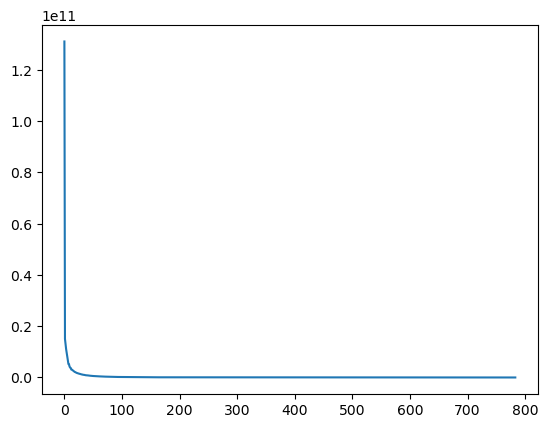

In [11]:
plt.plot(s)
print("Variance=",np.sum(s))
s.shape 

<font size=4> __Keeping Variance of the data__ Our goal is to keep 90% of the total variance. The code below plots a cumulative sum of the variance and shows that if we keep the first 231 singular values we have 90% of the variance.

d= 53


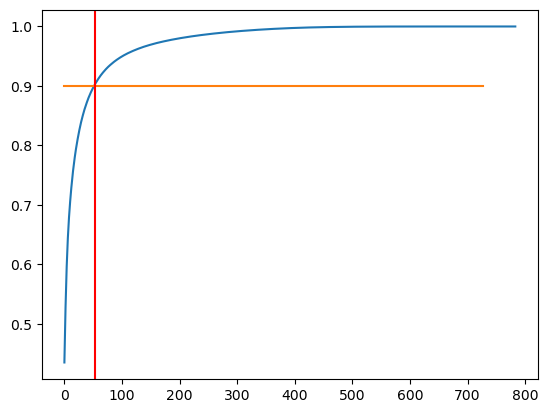

In [12]:
DS=np.cumsum(s)/np.sum(s)
V=.9
d=np.argmax(DS>=V)+1
plt.plot(DS)    
h_line = V*np.ones([728])
plt.plot(h_line)
plt.axvline(x=d,color='r')
print("d=",d)

## Using the SVD to reduce the data- Projection 


<font size=4> From 3 dimensions to 2 dimensions
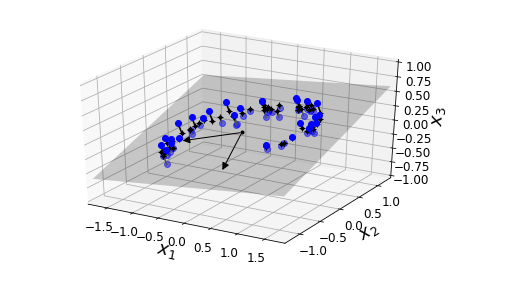


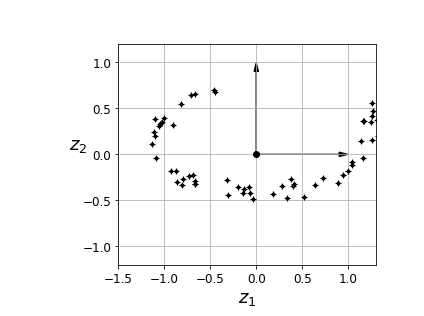

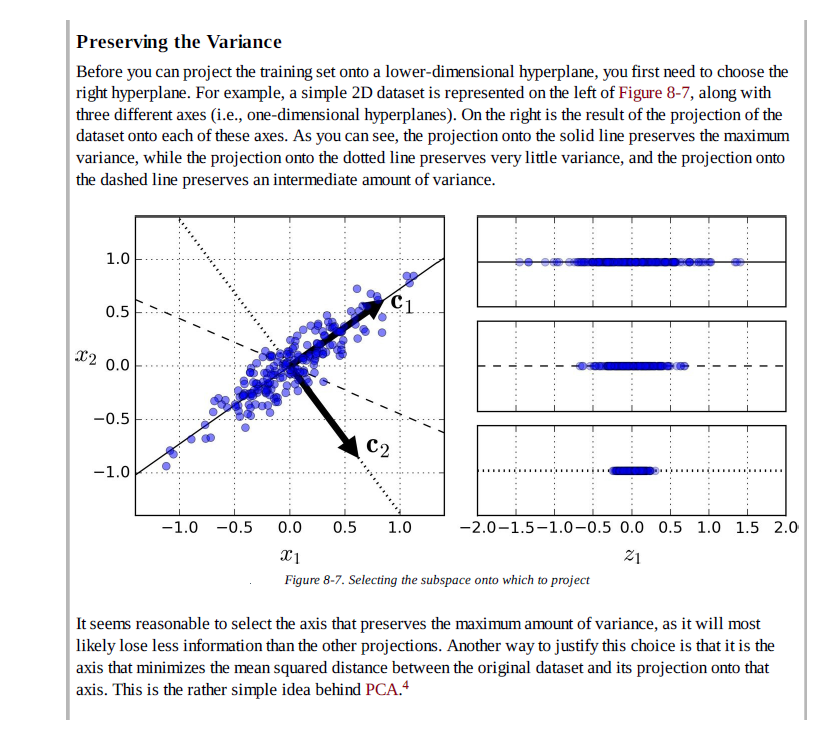

<font size=4> __How do we do this? We simply multiply our data by a sub matrix of U.__


* Multiply $X_{train}$ by $U_d$ which corresponds to the first $d$ columns of $U$. 

* Lets name it $XU_{d}=X_{train}U_d$.  What are the dimensions of this new matrix? 

* How much have you reduced the data? 

In [13]:
U_d=U[:,:d] # remember order kept the indicies of the largest eigenvalues
XU_d=np.dot(X_train,U_d)
XU_d.shape

(52500, 53)

In [14]:
d/784

0.06760204081632654

<font size=4> __Recovery:__ To recover vompressed version we simply need to multiply again on the right by $U_d^T$ that is $X_{recovered}=(X_{train}U_d)U_d^T.$ 

* Do the dimensions come out  right?  

* Compute the difference between the matrices like below  

 $$\frac{\|X_{train}-X_{recovered}\|_2^2}{\|X_{train}\|_2^2}$$

In [15]:
err=np.linalg.norm(X_train-np.dot(XU_d,U_d.T))**2/np.linalg.norm(X_train)**2
print(err)

0.0990178405708581


<font size=4> __Error:__ How does this error relate to preserving variance and selection of d? 

## Using the compressed data in a classification.

### For comparison Let's first do a classifier for the non reduced data.  This will take a couple minutes to run.

In [16]:
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
clf = LogisticRegression(random_state=42,max_iter=100)
#clf = SGDClassifier(random_state=42)
clf.fit(X_train, y_train)

LogisticRegression(random_state=42)

<font size=4> __Cross Validate__

In [17]:
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(clf, X_train, y_train, cv=3, scoring="accuracy")
print(cvs)


[0.91571429 0.91748571 0.91657143]


<font size=4> __Try Model on the tests set__

In [18]:
clf.score(X_test,y_test)

0.9201142857142857

###  Repeat the steps above for  $XU_{d}$ and compare accuracy. 

<font size=4> Now we train on the reduced data train on the reduced data.  Let's call the classifier something slightly different.
    
    sgd_clfr

In [19]:
from sklearn.linear_model import SGDClassifier
#sgd_clfr = SGDClassifier(random_state=42)
clf.fit(XU_d, y_train)

LogisticRegression(random_state=42)

<font size=4> __Cross Validate__

In [20]:
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(clf, XU_d, y_train, cv=3, scoring="accuracy")
print(cvs)

[0.90725714 0.90634286 0.91005714]


<font size=4> __Try Model on the tests set__

Now we will see how it performs on the test data. __<font color=red> Careful: we need the test data to have the same number of features as $X_{reduced}$ which has 234 features instead of 784. Transform the test data the same way you did the train data to reduce the number of features. before you score it.__

In [21]:
clf.score(np.dot(X_test,U_d),y_test)

0.9056

<font size =4 color =blue> __Time vs Accuracy__ 
    
Compare the time it took to train the models vs the loss in accuracy using the original data vs the reduced data.
    

## Scikit learns version

<font size=4>  Just to show we get about the same thing I included the [Sklearn version of PCA.]( https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

In [4]:
from sklearn.decomposition  import PCA
pca=PCA()

In [5]:
pca.fit(X_train)
pca=PCA(n_components=.9)
X_train_reduced=pca.fit_transform(X_train)
X_train_reduced.shape

(52500, 87)

In [6]:

clf.fit(X_train_reduced, y_train)

NameError: name 'clf' is not defined

In [25]:
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(clf, X_train_reduced, y_train, cv=3, scoring="accuracy")
print(cvs)

[0.90828571 0.91074286 0.91022857]


In [26]:
X_test_transformed=pca.transform(X_test)
clf.score(X_test_transformed,y_test)

0.9104

# TSNE

<font size=4>https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding

https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

In [27]:
from sklearn import datasets
from sklearn.preprocessing import scale
np.random.seed(5)
data = datasets.load_digits()
X=data.data
y=data.target

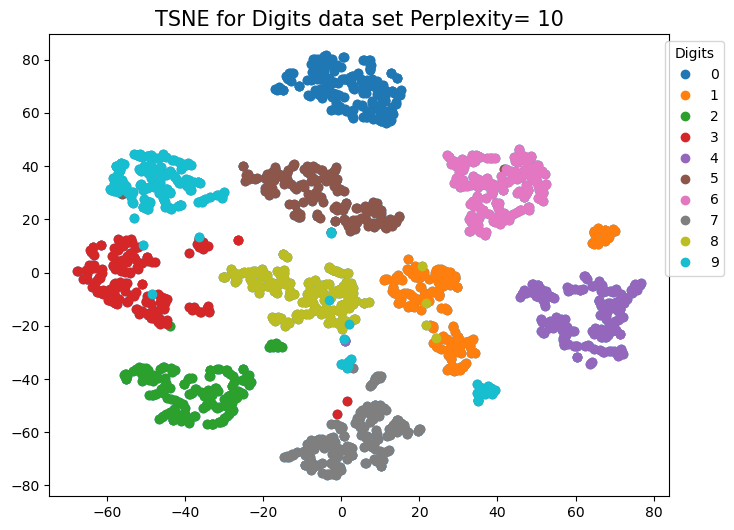

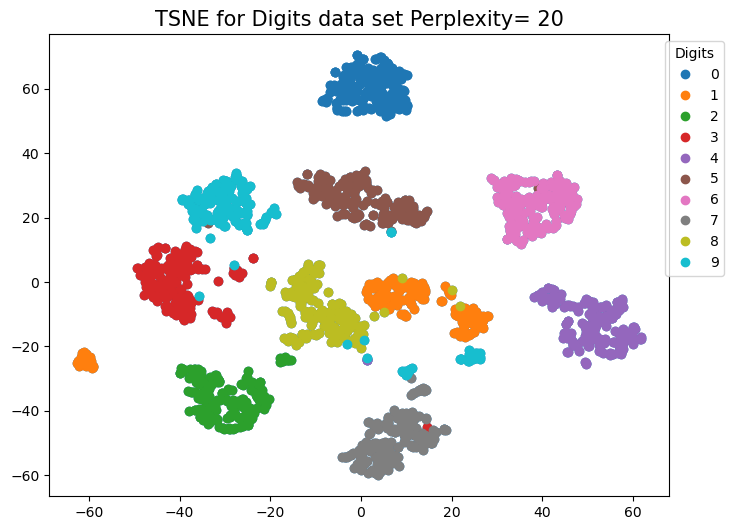

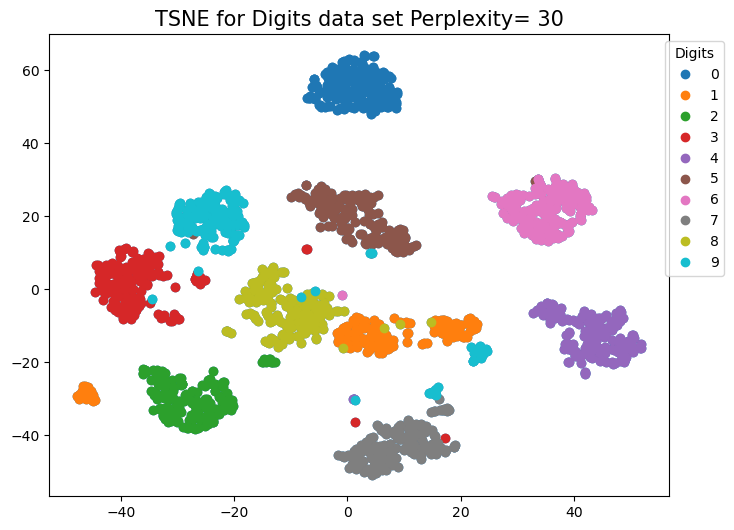

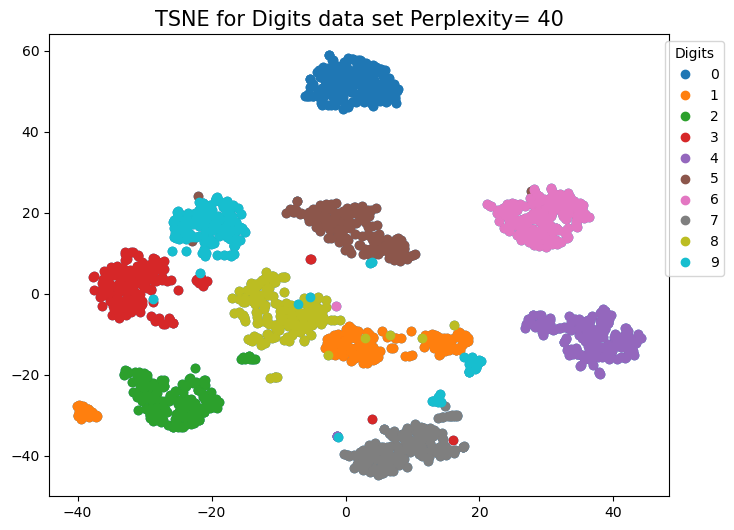

In [28]:
from sklearn import manifold
vals=[10,20,30,40]
dvals=[0,1,2,3,4,5,6,7,8,9]
for perp in vals:
    tsne = manifold.TSNE(n_components=2, init='pca', random_state=0,perplexity=perp)
    X_tsne = tsne.fit_transform(X)

    plt.figure(figsize=(8,6))
    for j in dvals:
        plt.plot(X_tsne[y==j, 0], X_tsne[y==j, 1], "o",label=j)
  
    plt.legend(title='Digits', bbox_to_anchor=(1.1, 1))
    plt.scatter(X_tsne[:,0], X_tsne[:,1] )
    plt.title('TSNE for Digits data set'r" Perplexity= {0}".format(round(perp,2)), fontsize=15)

# K- Means Clustering Example

<font size =4> Suppose you had the Iris data set and no one had  labeled the flowers with the measurements,  So you knew that there were three types of flowers  and  you wanted to look for patterns in the data.  Let's just use petal with and petal length to start.    

In [29]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn import datasets

np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
X2=X[:,(2,3)]
y=iris.target
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [30]:
# toggle
X2[0:10,:],y[:10]

(array([[1.4, 0.2],
        [1.4, 0.2],
        [1.3, 0.2],
        [1.5, 0.2],
        [1.4, 0.2],
        [1.7, 0.4],
        [1.4, 0.3],
        [1.5, 0.2],
        [1.4, 0.2],
        [1.5, 0.1]]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

<font size =4> Since we know the flowers come in 50 at a time for each class, let's Shuffle these up a bit and look again before we do K Means.

In [31]:
#toggle
from sklearn.utils import shuffle
import numpy as np
X2, y = shuffle(X2, y)
X2[0:10,:],y[:10]

(array([[3.9, 1.2],
        [5.6, 1.4],
        [5.1, 2.4],
        [1.3, 0.2],
        [6.1, 2.5],
        [3.3, 1. ],
        [1.4, 0.2],
        [4.8, 1.8],
        [1.6, 0.2],
        [4.5, 1.5]]),
 array([1, 2, 2, 0, 2, 1, 0, 1, 0, 1]))

<font size=4> Now just looking at the data it would be hard to determine which type of flower it is so let's visualize this by graphing the petal length and petal width.

Text(0, 0.5, 'Petal Width ')

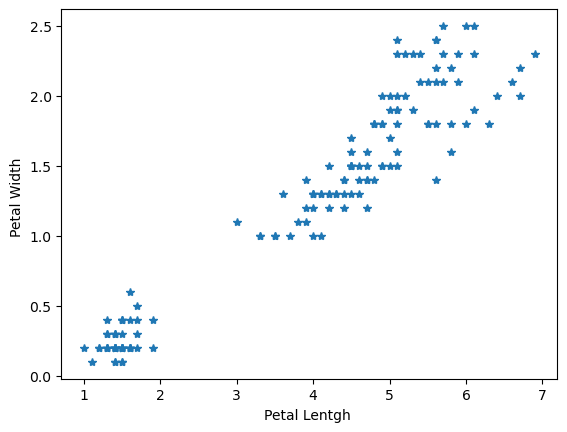

In [32]:
plt.plot(X2[:,0],X2[:,1],'*')
plt.xlabel("Petal Lentgh ")
plt.ylabel("Petal Width ")

<font size =4> There is clearly a grouping in the bottom left corner that is probably one type of flower but where to seperate the rest isn't clear at all.    Let's use the non supervised learning, [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html), to look for a clustering.  __<font color=red>Notice we are not using the targets/labels to fit the model.__

In [33]:
kmeans=KMeans(n_clusters=3, random_state=0).fit(X2)
yc=kmeans.labels_
c=kmeans.cluster_centers_

Text(0, 0.5, 'Petal Width ')

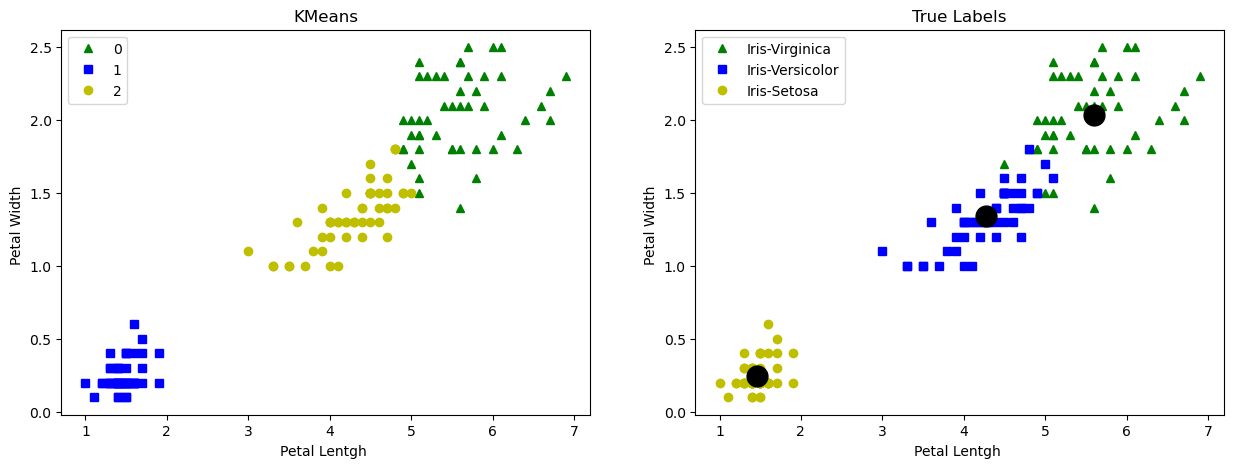

In [34]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.plot(X2[yc==2, 0], X2[yc==2, 1], "g^", label="0")
plt.plot(X2[yc==1, 0], X2[yc==1, 1], "bs", label="1")
plt.plot(X2[yc==0, 0], X2[yc==0, 1], "yo", label="2")
plt.legend()
plt.title("KMeans")
plt.xlabel("Petal Lentgh ")
plt.ylabel("Petal Width ")

plt.subplot(1, 2, 2)
plt.plot(X2[y==2, 0], X2[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X2[y==1, 0], X2[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X2[y==0, 0], X2[y==0, 1], "yo", label="Iris-Setosa")
plt.plot(c[:,0],c[:,1],'ko',markersize=15)
plt.legend()
plt.title("True Labels")
plt.xlabel("Petal Lentgh ")
plt.ylabel("Petal Width ")

<font size =4> __Note we could have done this in three dimenstions as well [Sklearn tutorial](https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_iris.html#sphx-glr-auto-examples-cluster-plot-cluster-iris-py)__
Often the examples we do are in 2d or 3d so we can visualize them.  

## How does k-Means work?

<font size =4> The k in k-Means stands for the number of clusters we are looking for. Above we had k=3 fro the three classes of flowers.  For each cluster we will find a centroid (center) associated it.   So how do we find the centers?
   
    Algorithm 
        1) Initialize the centers(guess k centers)
        2)  Repeat below until converges (that is until the centers don't change any more)
                a) Assign points to the nearest cluster center
                b) Reset the cluster centers to the centroids of the assignment above
    
There is a good notebook on this by [Jake VanderPlas.](https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html) I is a lot of code to digest so let's just focus on the image it produces.

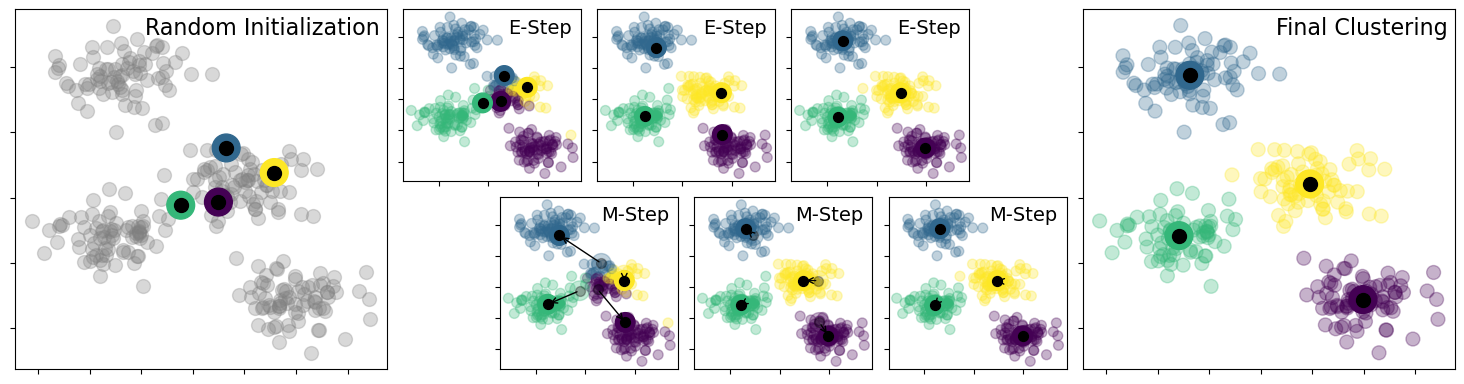

In [35]:
from sklearn.datasets import make_blobs
from sklearn.metrics import pairwise_distances_argmin

X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)

rng = np.random.RandomState(42)
centers = [0, 4] + rng.randn(4, 2)

def draw_points(ax, c, factor=1):
    ax.scatter(X[:, 0], X[:, 1], c=c, cmap='viridis',
               s=50 * factor, alpha=0.3)
    
def draw_centers(ax, centers, factor=1, alpha=1.0):
    ax.scatter(centers[:, 0], centers[:, 1],
               c=np.arange(4), cmap='viridis', s=200 * factor,
               alpha=alpha)
    ax.scatter(centers[:, 0], centers[:, 1],
               c='black', s=50 * factor, alpha=alpha)

def make_ax(fig, gs):
    ax = fig.add_subplot(gs)
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.yaxis.set_major_formatter(plt.NullFormatter())
    return ax

fig = plt.figure(figsize=(15, 4))
gs = plt.GridSpec(4, 15, left=0.02, right=0.98, bottom=0.05, top=0.95, wspace=0.2, hspace=0.2)
ax0 = make_ax(fig, gs[:4, :4])
ax0.text(0.98, 0.98, "Random Initialization", transform=ax0.transAxes,
         ha='right', va='top', size=16)
draw_points(ax0, 'gray', factor=2)
draw_centers(ax0, centers, factor=2)

for i in range(3):
    ax1 = make_ax(fig, gs[:2, 4 + 2 * i:6 + 2 * i])
    ax2 = make_ax(fig, gs[2:, 5 + 2 * i:7 + 2 * i])
    
    # E-step
    y_pred = pairwise_distances_argmin(X, centers)
    draw_points(ax1, y_pred)
    draw_centers(ax1, centers)
    
    # M-step
    new_centers = np.array([X[y_pred == i].mean(0) for i in range(4)])
    draw_points(ax2, y_pred)
    draw_centers(ax2, centers, alpha=0.3)
    draw_centers(ax2, new_centers)
    for i in range(4):
        ax2.annotate('', new_centers[i], centers[i],
                     arrowprops=dict(arrowstyle='->', linewidth=1))
        
    
    # Finish iteration
    centers = new_centers
    ax1.text(0.95, 0.95, "E-Step", transform=ax1.transAxes, ha='right', va='top', size=14)
    ax2.text(0.95, 0.95, "M-Step", transform=ax2.transAxes, ha='right', va='top', size=14)


# Final E-step    
y_pred = pairwise_distances_argmin(X, centers)
axf = make_ax(fig, gs[:4, -4:])
draw_points(axf, y_pred, factor=2)
draw_centers(axf, centers, factor=2)
axf.text(0.98, 0.98, "Final Clustering", transform=axf.transAxes,
         ha='right', va='top', size=16)


fig.savefig('05.11-expectation-maximization.png')

<font size =4>  Let's take a closer look at an image we can resize.  [K means by steps IMAGE](http://people.uncw.edu/lammersm/Data/05.11-expectation-maximization.png)

## Application SLIC

<font size=4>[SLIC+](https://scikit-image.org/docs/stable/auto_examples/segmentation/plot_segmentations.html#sphx-glr-auto-examples-segmentation-plot-segmentations-py)
    
[Scikit-Image](https://scikit-image.org/docs/stable/auto_examples/)

Felzenszwalb number of segments: 194
SLIC number of segments: 196
Quickshift number of segments: 695


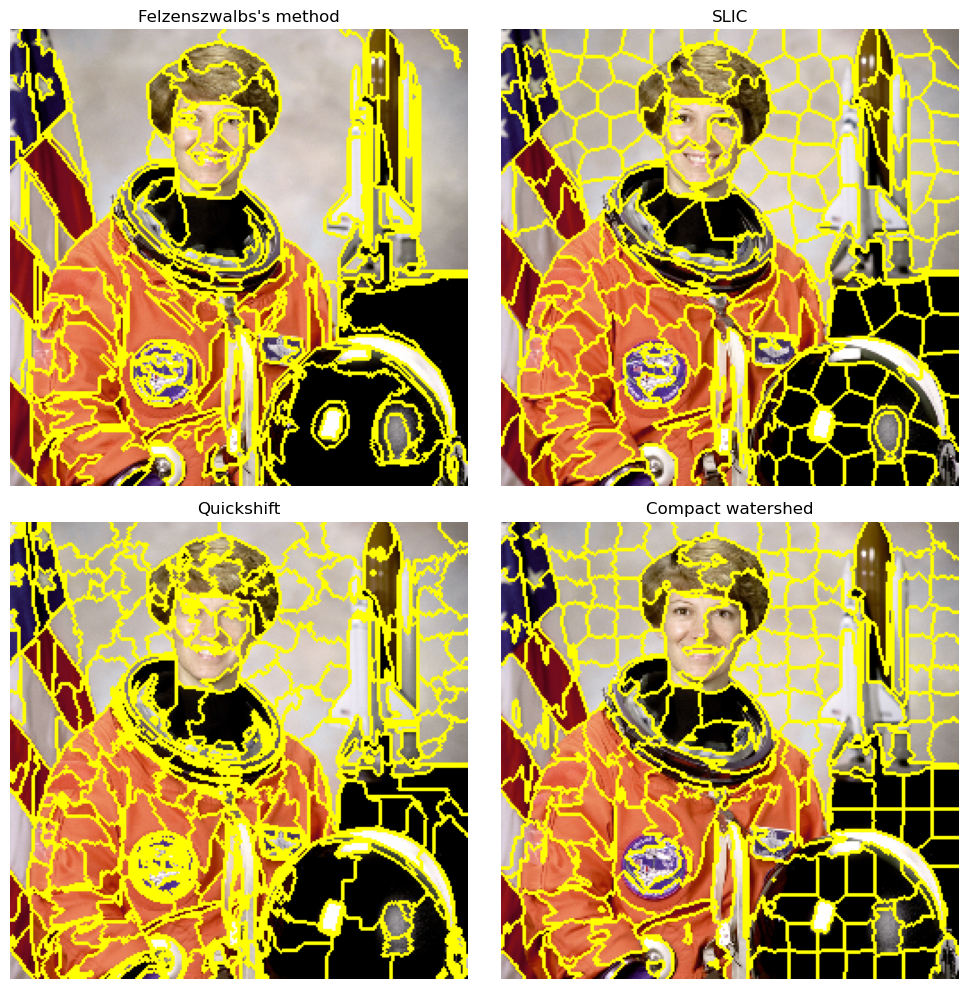

In [36]:
import numpy as np

from skimage.data import astronaut
from skimage.color import rgb2gray
from skimage.filters import sobel
from skimage.segmentation import felzenszwalb, slic, quickshift, watershed
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float

img = img_as_float(astronaut()[::2, ::2])

segments_fz = felzenszwalb(img, scale=100, sigma=0.5, min_size=50)
segments_slic = slic(img, n_segments=250, compactness=10, sigma=1,
                     start_label=1)
segments_quick = quickshift(img, kernel_size=3, max_dist=6, ratio=0.5)
gradient = sobel(rgb2gray(img))
segments_watershed = watershed(gradient, markers=250, compactness=0.001)

print(f"Felzenszwalb number of segments: {len(np.unique(segments_fz))}")
print(f"SLIC number of segments: {len(np.unique(segments_slic))}")
print(f"Quickshift number of segments: {len(np.unique(segments_quick))}")

fig, ax = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)

ax[0, 0].imshow(mark_boundaries(img, segments_fz))
ax[0, 0].set_title("Felzenszwalbs's method")
ax[0, 1].imshow(mark_boundaries(img, segments_slic))
ax[0, 1].set_title('SLIC')
ax[1, 0].imshow(mark_boundaries(img, segments_quick))
ax[1, 0].set_title('Quickshift')
ax[1, 1].imshow(mark_boundaries(img, segments_watershed))
ax[1, 1].set_title('Compact watershed')

for a in ax.ravel():
    a.set_axis_off()

plt.tight_layout()
plt.show()